<a href="https://colab.research.google.com/github/deeplearning-itba/Clase_1-Pesos-y-Alturas-Bayes/blob/master/10-Clasific-KNN-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

Anotaciones:
Desde el lado de Estadistica querriamos ver que tan bueno se aproxima a una gaussiana. Desde ML que tan bien generaliza

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

In [3]:
! wget https://raw.githubusercontent.com/deeplearning-itba/Clase_1-Pesos-y-Alturas-Bayes/master/data/alturas-pesos-mils-train.csv
! wget https://raw.githubusercontent.com/deeplearning-itba/Clase_1-Pesos-y-Alturas-Bayes/master/data/alturas-pesos-mils-test.csv
! wget https://raw.githubusercontent.com/deeplearning-itba/Clase_1-Pesos-y-Alturas-Bayes/master/BiVariateJoint.py

--2020-04-14 17:43:11--  https://raw.githubusercontent.com/deeplearning-itba/Clase_1-Pesos-y-Alturas-Bayes/master/data/alturas-pesos-mils-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240527 (235K) [text/plain]
Saving to: ‘alturas-pesos-mils-train.csv’

alturas-pesos-mils- 100%[===================>] 234.89K  --.-KB/s    in 0.05s   

2020-04-14 17:43:11 (4.65 MB/s) - ‘alturas-pesos-mils-train.csv’ saved [240527/240527]

--2020-04-14 17:43:15--  https://raw.githubusercontent.com/deeplearning-itba/Clase_1-Pesos-y-Alturas-Bayes/master/data/alturas-pesos-mils-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.

In [0]:
data = pd.read_csv('alturas-pesos-mils-train.csv')[:-1]

In [0]:
test = pd.read_csv('alturas-pesos-mils-test.csv')

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(data[['Peso', 'Altura']].values, data['Genero'])
clf.score(data[['Peso', 'Altura']].values, data['Genero'])
clf.score(test[['Peso', 'Altura']].values, test['Genero'])

In [0]:
# from BiVariateJoint import BiVariateJoint

In [0]:
data_hombres = data.loc[data['Genero']=='Hombre'][['Peso','Altura']].values
data_mujeres = data.loc[data['Genero']=='Mujer'][['Peso','Altura']].values

# Grafico los datos

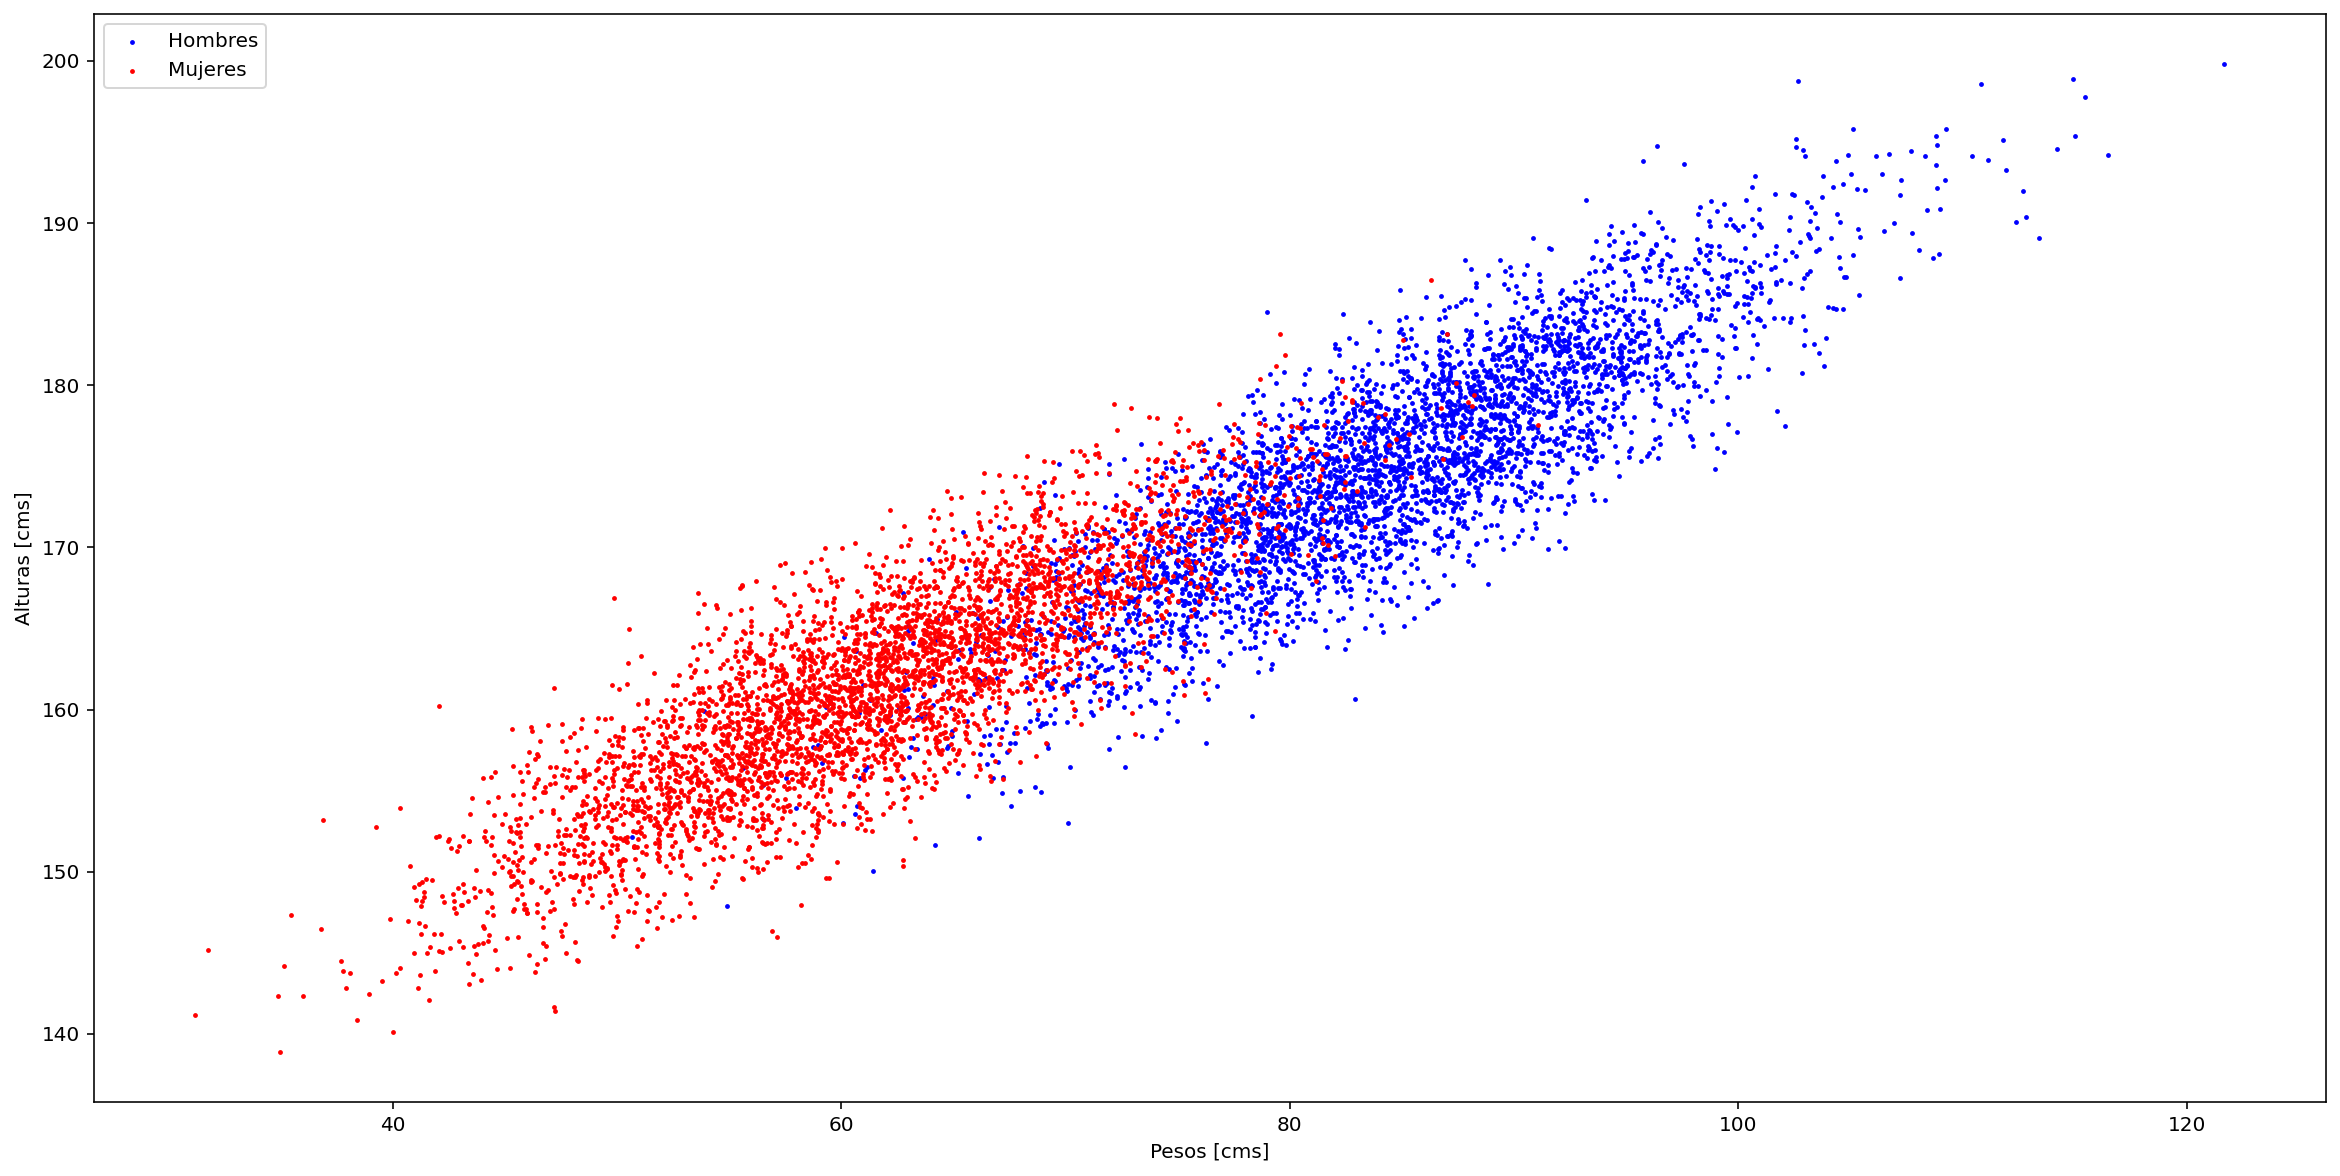

In [15]:
#%matplotlib qt
f = plt.figure(figsize=(20,10))
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, label='Hombres')
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, label='Mujeres')
plt.xlabel('Pesos [cms]')
plt.ylabel('Alturas [cms]')
plt.legend()
plt.show()

# KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn_clf.fit(data[['Peso', 'Altura']].values, data['Genero'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
acc_train_knn = clf.score(data[['Peso', 'Altura']].values, data['Genero'])
acc_CV_knn = clf.score(test[['Peso', 'Altura']].values, test['Genero'])

In [21]:
print(acc_train_knn, acc_CV_knn)

0.9284910613826728 0.9055


In [22]:
knn_clf.predict_proba(test[['Peso', 'Altura']].values)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [0]:
N = 300
X = np.linspace(data.min()['Peso'], data.max()['Peso'], N)
Y = np.linspace(data.min()['Altura'], data.max()['Altura'], N)
X, Y = np.meshgrid(X, Y)

Z_lr = knn_clf.predict_proba(np.c_[X.ravel(), Y.ravel()])[:, 0]

# Put the result into a color plot
Z_lr = Z_lr.reshape(X.shape)

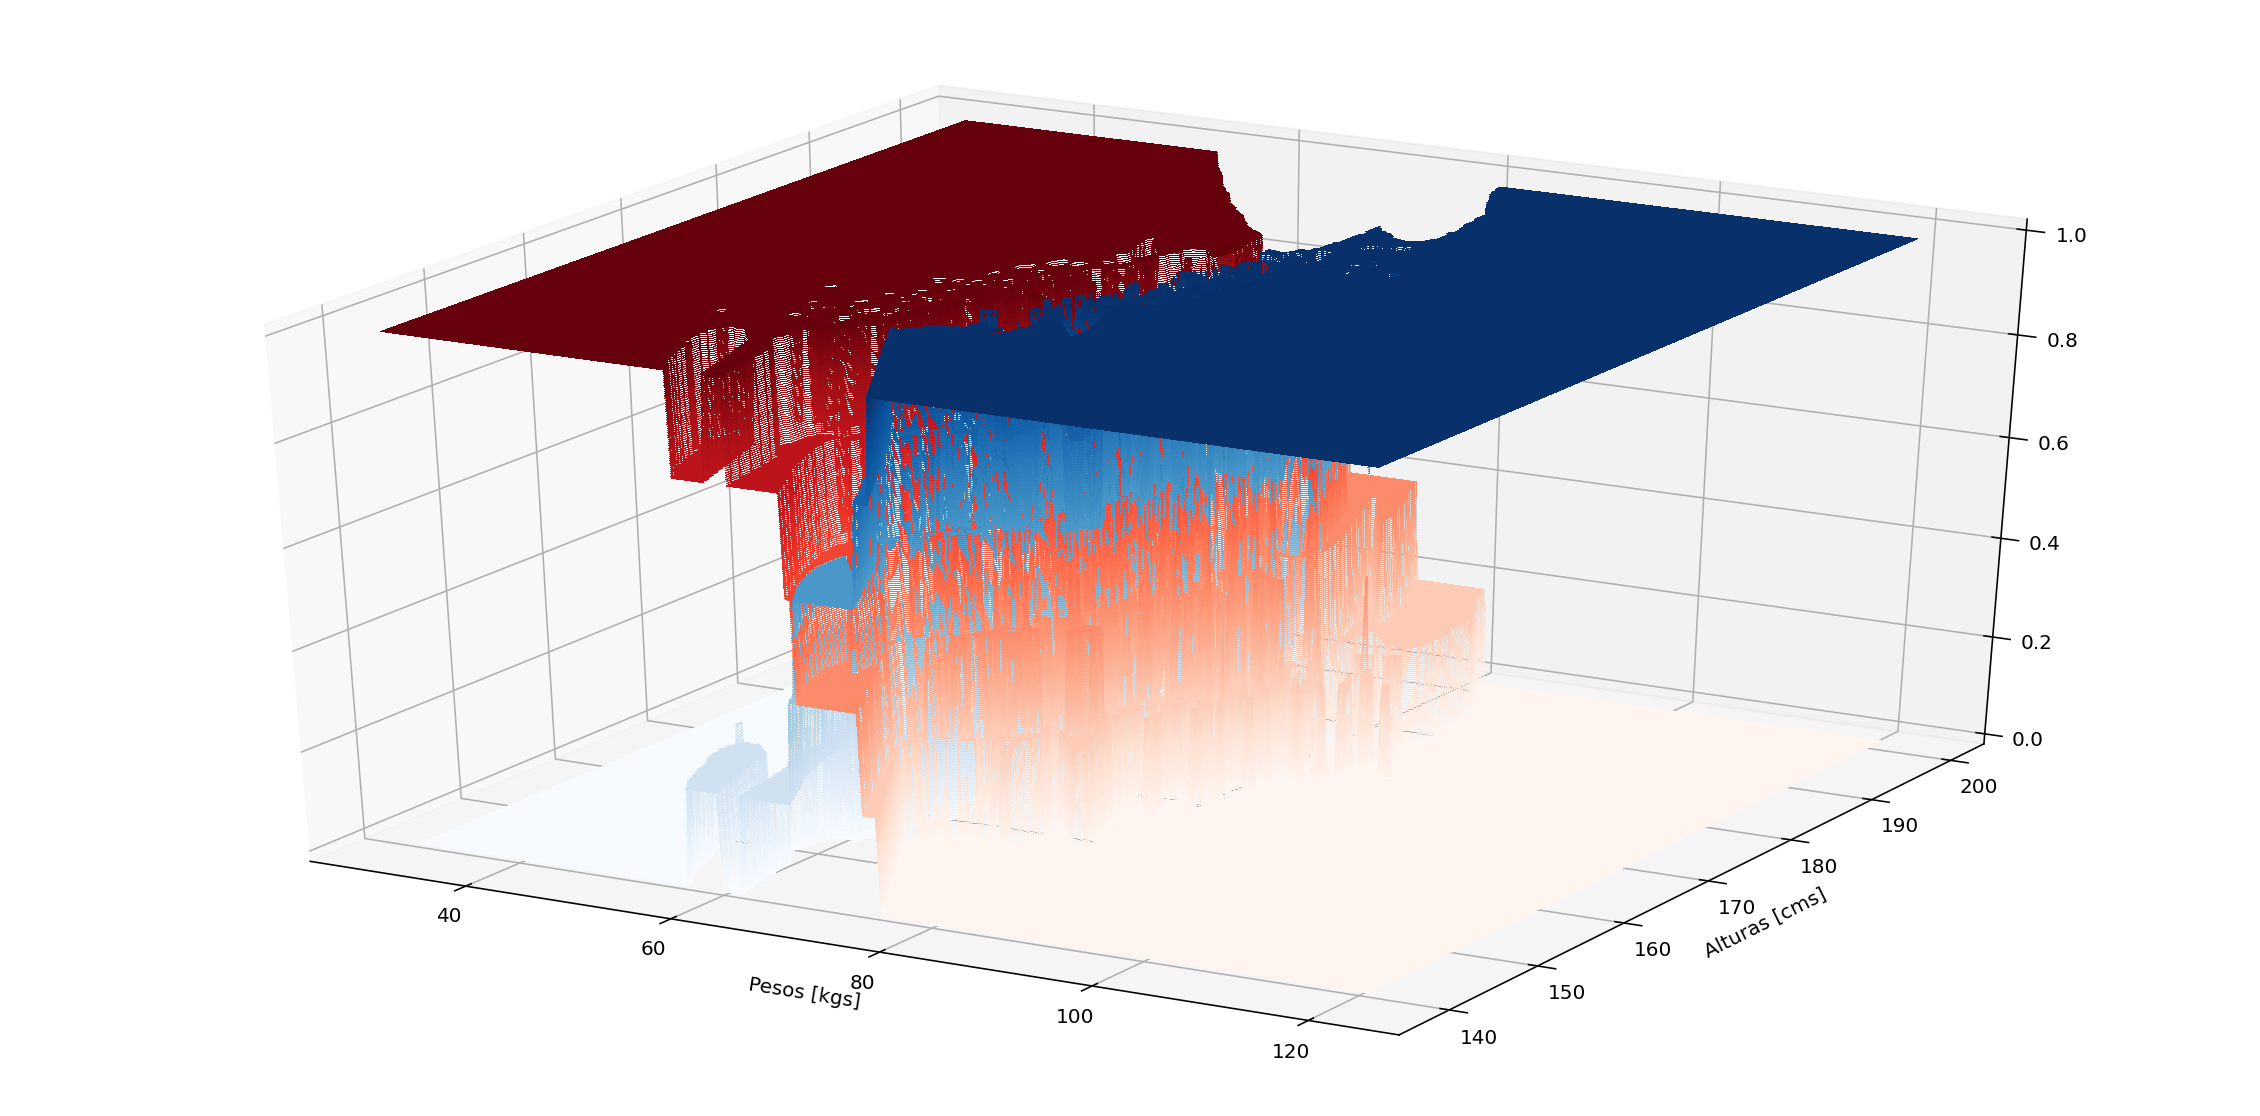

In [24]:
#%matplotlib qt
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
cm_blues = plt.cm.Blues
cm_greens = plt.cm.Reds
ax.contourf(X, Y, Z_lr, 256, vmin=0., vmax=1., cmap=cm_blues)
ax.contourf(X, Y, 1-Z_lr, 256, vmin=0., vmax=1., cmap=cm_greens)
# ax.set_title('TRAIN: ' + str(np.round(acc_train_LR*100)/100) + ' - CV:' + str(np.round(acc_CV_LR*100)/100))
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
#ax.view_init(70, -90)
plt.show()

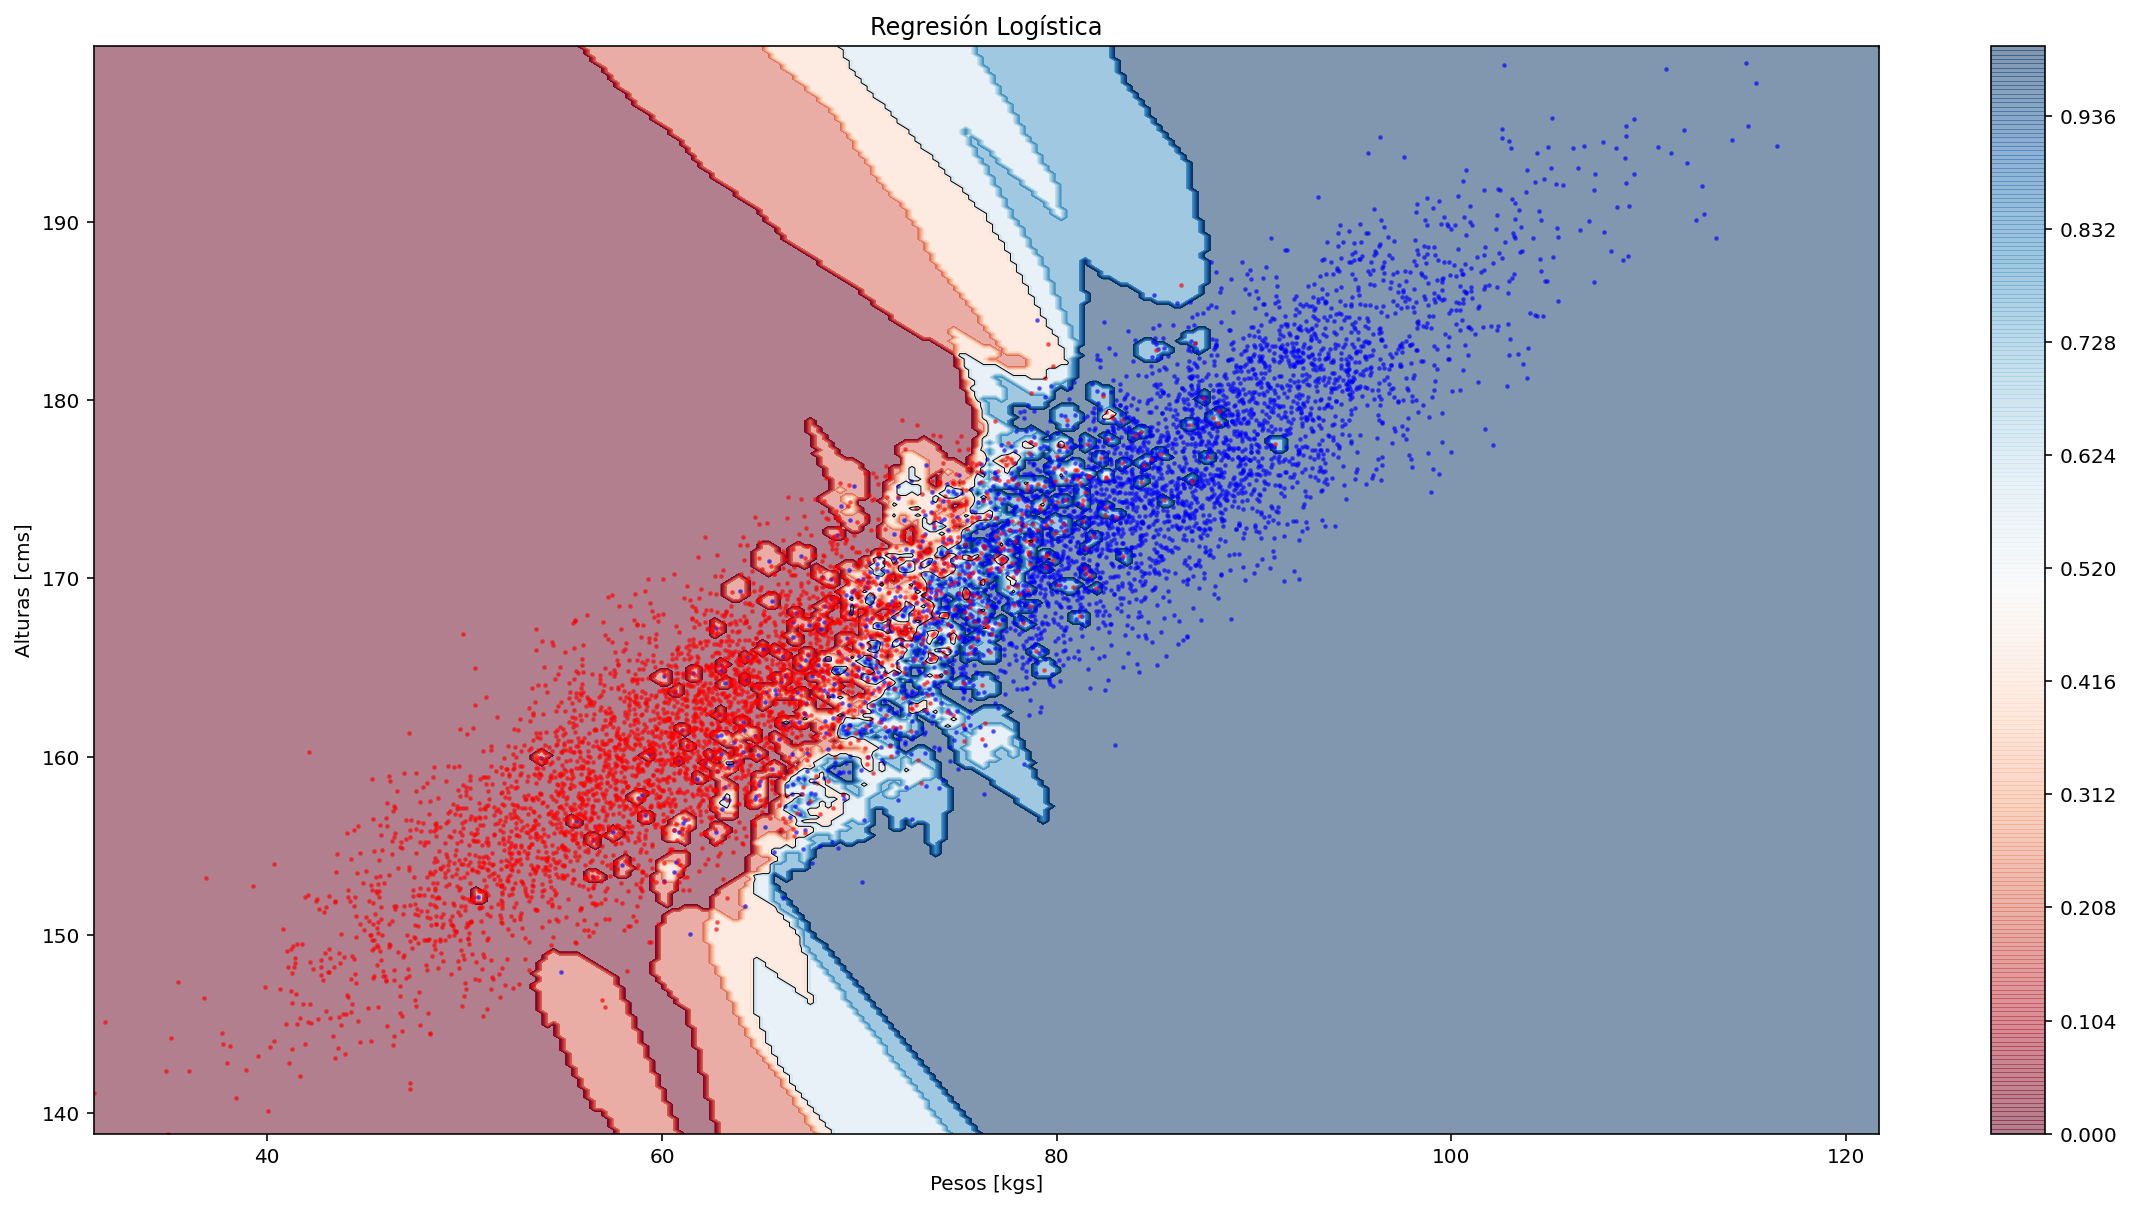

In [25]:
#%matplotlib qt
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_lr, 256, alpha=.5, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.contour(X, Y, Z_lr, (0.5,), colors='k', linewidths=0.5)
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, alpha=0.5)
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, alpha=0.5)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.title('Regresión Logística')
plt.show()

|Modelo| tipo| Train Acc| CV Acc|Comentarios
|-| -| -| -|-|
|Histogram - step 0.25|Bayes|0.97|0.68
|Histogram - step 0.25|Naive Bayes|0.89|0.88
|Histogram - step 0.5|Bayes|0.94|0.82
|Histogram - step 0.5|Naive Bayes|0.89|0.88
|Histogram - step 1|Bayes|0.92|0.90
|Histogram - step 1|Naive Bayes|0.89|0.88
|Histogram - step 4|Bayes|0.91|0.92| No generaliza por afuera de la zona de los puntos
|Histogram - step 4|Naive Bayes|0.89|0.88
|Histogram - step 8|Bayes|0.90|0.90
|Histogram - step 8|Naive Bayes|0.87|0.86
|Gaussian|Bayes|0.92|0.92|
|Gaussian|Naive Bayes|0.89|0.89|
|Regresion Logística|-|0.92|0.92|